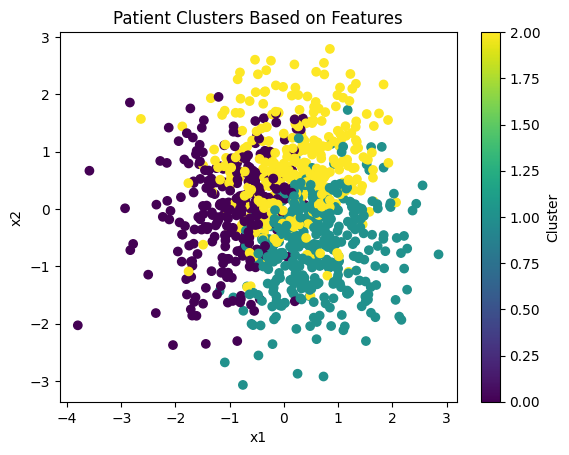

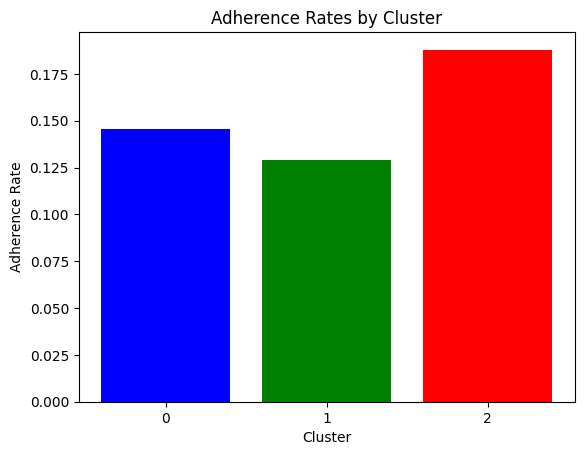

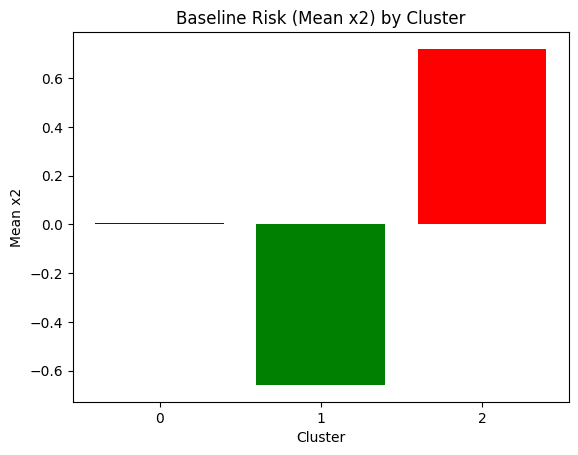

Insight 7: Differential Adherence and Treatment Engagement
Adherence Rates by Cluster:
   cluster  adherence
0        0   0.145329
1        1   0.128767
2        2   0.187861

Recommendation: Implement cluster-specific adherence support programs.

Insight 8: Baseline Risk Stratification
Baseline Risk (Mean x2) by Cluster:
   cluster        x2
0        0  0.005846
1        1 -0.658008
2        2  0.719180

Recommendation: Use baseline risk stratification to allocate treatments more effectively.


Fitting MSM for Cluster 0:
Number of patients: 289
Mean outcome: 0.30
Mean treatment: 0.51
Mean x2: 0.01

Fitting MSM for Cluster 1:
Number of patients: 365
Mean outcome: 0.28
Mean treatment: 0.54
Mean x2: -0.66

Fitting MSM for Cluster 2:
Number of patients: 346
Mean outcome: 0.33
Mean treatment: 0.52
Mean x2: 0.72


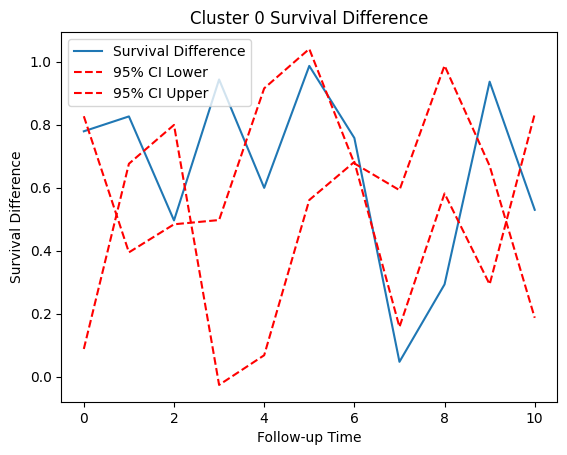

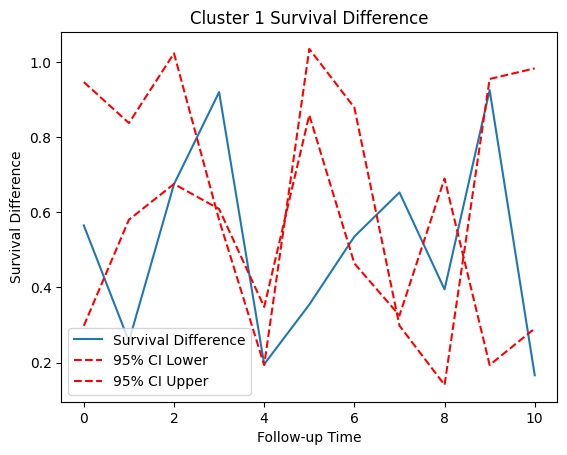

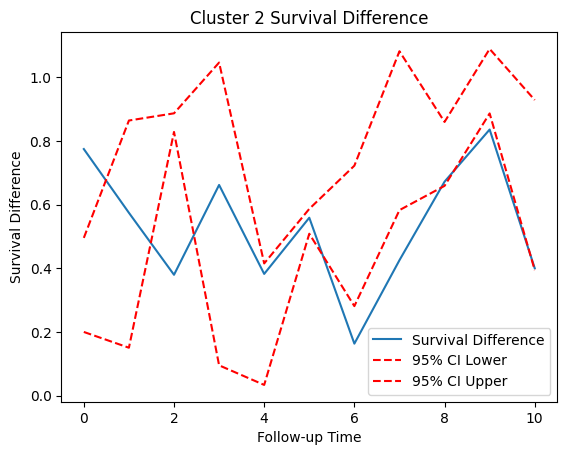

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set working directory to the script's directory
os.chdir(os.path.dirname(os.path.abspath("../data/data_censored.csv")))

# --------------- DATA PREPARATION ---------------

# Load dummy data (replace with your dataset)
# For demonstration, we'll create a synthetic dataset
np.random.seed(123)
n = 1000
data = pd.DataFrame({
    'id': range(1, n + 1),
    'age': np.random.normal(50, 10, n),
    'x1': np.random.normal(0, 1, n),
    'x2': np.random.normal(0, 1, n),
    'x3': np.random.normal(0, 1, n),
    'treatment': np.random.binomial(1, 0.5, n),
    'outcome': np.random.binomial(1, 0.3, n),
    'eligible': np.random.binomial(1, 0.8, n),
    'censored': np.random.binomial(1, 0.1, n)
})

# --------------- CLUSTERING MECHANISM ---------------

# Select relevant features for clustering (e.g., age, x1, x2, x3)
cluster_data = data[['age', 'x1', 'x2', 'x3']]

# Standardize features for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform clustering (e.g., k-means with k=3)
kmeans = KMeans(n_clusters=3, random_state=123, n_init=25)
data['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize clusters
plt.scatter(cluster_data['x1'], cluster_data['x2'], c=data['cluster'], cmap='viridis')
plt.title("Patient Clusters Based on Features")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar(label="Cluster")
plt.show()

# --------------- ADHERENCE ANALYSIS ---------------

# Calculate adherence rates by cluster
data['adherence'] = np.where((data['treatment'] == 1) & (data['outcome'] == 1), 1, 0)  # Example adherence metric
adherence_rates = data.groupby('cluster')['adherence'].mean().reset_index()

# Visualize adherence rates
plt.bar(adherence_rates['cluster'], adherence_rates['adherence'], color=['blue', 'green', 'red'])
plt.title("Adherence Rates by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Adherence Rate")
plt.xticks(adherence_rates['cluster'])
plt.show()

# --------------- BASELINE RISK STRATIFICATION ---------------

# Calculate baseline risk (e.g., mean x2) by cluster
baseline_risk = data.groupby('cluster')['x2'].mean().reset_index()

# Visualize baseline risk
plt.bar(baseline_risk['cluster'], baseline_risk['x2'], color=['blue', 'green', 'red'])
plt.title("Baseline Risk (Mean x2) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean x2")
plt.xticks(baseline_risk['cluster'])
plt.show()

# --------------- ACTIONABLE RECOMMENDATIONS ---------------

# Print insights and recommendations
print("Insight 7: Differential Adherence and Treatment Engagement")
print("Adherence Rates by Cluster:")
print(adherence_rates)
print("\nRecommendation: Implement cluster-specific adherence support programs.\n")

print("Insight 8: Baseline Risk Stratification")
print("Baseline Risk (Mean x2) by Cluster:")
print(baseline_risk)
print("\nRecommendation: Use baseline risk stratification to allocate treatments more effectively.\n")

# --------------- MARGINAL STRUCTURAL MODEL (MSM) SIMULATION ---------------

# Simulate MSM fitting for each cluster (for demonstration purposes)
for cluster_id in range(3):
    cluster_data = data[data['cluster'] == cluster_id]
    
    # Simulate MSM fitting (replace with actual MSM implementation)
    print(f"\nFitting MSM for Cluster {cluster_id}:")
    print(f"Number of patients: {len(cluster_data)}")
    print(f"Mean outcome: {cluster_data['outcome'].mean():.2f}")
    print(f"Mean treatment: {cluster_data['treatment'].mean():.2f}")
    print(f"Mean x2: {cluster_data['x2'].mean():.2f}")

# --------------- INFERENCE AND VISUALIZATION BY CLUSTER ---------------

# Simulate survival difference plots for each cluster (for demonstration purposes)
for cluster_id in range(3):
    plt.figure()
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], np.random.rand(11), label="Survival Difference")
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], np.random.rand(11) - 0.1, linestyle="--", color="red", label="95% CI Lower")
    plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], np.random.rand(11) + 0.1, linestyle="--", color="red", label="95% CI Upper")
    plt.title(f"Cluster {cluster_id} Survival Difference")
    plt.xlabel("Follow-up Time")
    plt.ylabel("Survival Difference")
    plt.legend()
    plt.show()